# Cellular Automata-Based Algorithm

In [72]:
import numpy as np
from PIL import Image
from scipy.ndimage import sobel 
import matplotlib.pyplot as plt
import cv2

In [73]:
# Load and convert the image to grayscale
image_path = "Aug_1.jpg"  # Replace with your image path
mammogram_image = Image.open(image_path).convert('L')
image_array = np.array(mammogram_image)

In [74]:
# 1. Gray Level Edge Detection
def gray_level_edge_detection(image, threshold=20):
    """
    Apply Cellular Automata for edge detection on grayscale images.
    """
    rows, cols = image.shape
    edge_image = np.zeros_like(image)
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Von Neumann's Neighborhood
            neighbors = [
                image[i - 1, j],  # Top
                image[i + 1, j],  # Bottom
                image[i, j - 1],  # Left
                image[i, j + 1]   # Right
            ]
            if max(neighbors) - min(neighbors) > threshold:
                edge_image[i, j] = 255
    return edge_image

In [75]:
# 2. Binary Edge Detection
def binary_edge_detection(image, threshold=50):
    """
    Apply Sobel operator to create a binary edge map.
    """
    gradient_x = sobel(image, axis=1, mode='reflect')
    gradient_y = sobel(image, axis=0, mode='reflect')
    gradient_magnitude = np.hypot(gradient_x, gradient_y)
    binary_edges = (gradient_magnitude > threshold).astype(np.uint8) * 255
    return binary_edges

In [76]:
### Addining salt and pepper noise
def add_salt_and_pepper(image, amount):
    noisy_image = np.copy(image)
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords] = 1

    num_pepper = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords] = 0

    return noisy_image

In [77]:
# 3. Noise Filtering
def noise_filtering(image, threshold=20, iterations=1):
    """
    Use Von Neumann's neighborhood to reduce noise.
    """
    filtered_image = image.copy()
    for _ in range(iterations):
        new_image = filtered_image.copy()
        rows, cols = filtered_image.shape
        
        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                # Von Neumann's neighborhood
                neighbors = [
                    filtered_image[i - 1, j],
                    filtered_image[i + 1, j],
                    filtered_image[i, j - 1],
                    filtered_image[i, j + 1]
                ]
                mean_neighbors = np.mean(neighbors)
                if abs(filtered_image[i, j] - mean_neighbors) > threshold:
                    new_image[i, j] = mean_neighbors
        filtered_image = new_image
    return filtered_image

In [78]:
# 4. Spot Detection
def spot_detection(original_image, edge_image, threshold=200):
    """
    Subtract edge map from the original image to enhance white spots.
    """
    spots = original_image - edge_image
    spots[spots < threshold] = 0
    return spots

C:\Users\saruu\AppData\Local\Temp\ipykernel_14732\1088838135.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy_image[coords] = 1
C:\Users\saruu\AppData\Local\Temp\ipykernel_14732\1088838135.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noisy_image[coords] = 0


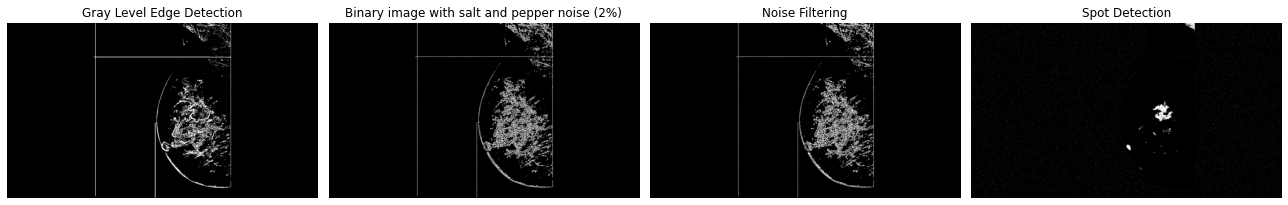

In [79]:
# Run the full pipeline
gray_edge_image = gray_level_edge_detection(image_array, threshold=20)
binary_edge_image = binary_edge_detection(gray_edge_image, threshold=50)
noisy_image = add_salt_and_pepper(binary_edge_image, 0.02)
filtered_image = noise_filtering(noisy_image, threshold=200)
spots_image = spot_detection(image_array, filtered_image, threshold=200)

# Display results
plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.imshow(gray_edge_image, cmap='gray')
plt.title("Gray Level Edge Detection")
plt.axis('off')
plt.savefig('Gray Level Edge Detection.png')

plt.subplot(1, 4, 2)
plt.imshow(binary_edge_image, cmap='gray')
plt.title("Binary Edge Detection")
plt.axis('off')
plt.savefig('Binary Edge Detection.png')

plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Binary image with salt and pepper noise (2%)")
plt.axis('off')
plt.savefig('Noisy Image.png')

plt.subplot(1, 4, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title("Noise Filtering")
plt.axis('off')
plt.savefig('Noise Filtering.png')

plt.subplot(1, 4, 4)
plt.imshow(spots_image, cmap='gray')
plt.title("Spot Detection")
plt.axis('off')
plt.savefig('Spot Detection.png')

plt.tight_layout()
plt.show()


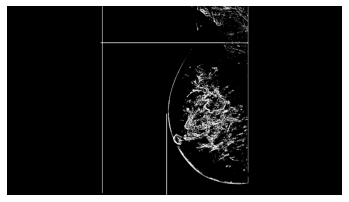

In [80]:
plt.imshow(gray_edge_image, cmap='gray')
plt.axis('off')
plt.savefig('Gray Level Edge Detection.png')

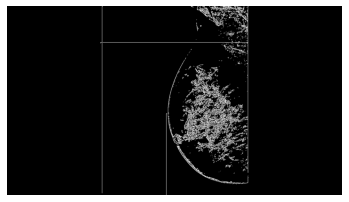

In [81]:
plt.imshow(binary_edge_image, cmap='gray')
plt.axis('off')
plt.savefig('Binary Edge Detection.png')

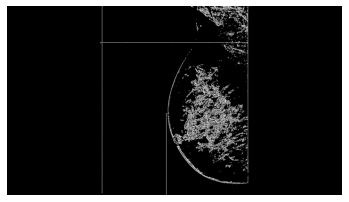

In [82]:
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.savefig('Noisy Image.png')

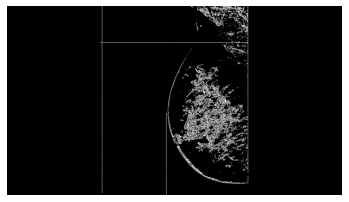

In [83]:
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')
plt.savefig('Noise Filtering.png')

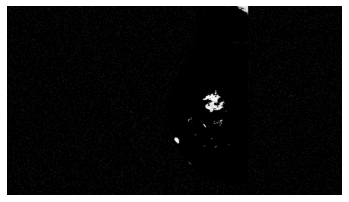

In [84]:
plt.imshow(spots_image, cmap='gray')
plt.axis('off')
plt.savefig('Spot Detection.png')